In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run DM Continuous

In [4]:
from pycausal import search as s
inputs = [0,1,2,3]
outputs = [4]
useGES = True
trueInputs = [0,1,2,3]
alphaPC = .05
verbose = True
# if useGES == False
# alphaSober = .05 
# if useGES == True
gesDiscount = 10
minDiscount = 4
dm = s.dm(df, inputs, outputs, trueInputs, useGES, alphaPC, verbose, gesDiscount, minDiscount)

#### DM Continuous' Result's Nodes

In [5]:
dm.getNodes()

['L0', 'Sympathy', 'Impact']

#### DM Continuous' Result's Edges

In [6]:
dm.getEdges()

['L0 --> Impact', 'Sympathy --> L0']

#### Plot The Result's Graph

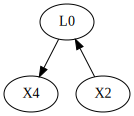

In [7]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(dm.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [8]:
pc.stop_vm()